### **MIgrating pattern to the United States of America from 1980 to 2013**

**The script here presents a cleaner version of the EDA scripts and automates the data visualisation process**

**For data source click** <a href= "https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp">Here<a/>

<br/> Author **Shereef Bankole**
<br/> **LinkedIn click** <a href="https://www.linkedin.com/in/shereef-b-b9aab823/\">Here<a/>
<br/> **Github click**  <a href= "https://github.com/SAB-6\">Here<a/>

https://geology.com/state-map/kansas.shtml

**Install folium, pywaffle and WordCloud,**

In [1]:
!pip install folium
print('folium now installed')
!pip install WordCloud
print("wordcloud installed")
!pip install pywaffle
print("pywaffle installed")

folium now installed
wordcloud installed
pywaffle installed


**Import required packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from ipywidgets import interact, widgets
from wordcloud import WordCloud, STOPWORDS
import folium
from pywaffle import Waffle
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [3]:
USA_map=folium.Map(location=[37.0902, -95.7129], zoom_start=5, tiles='Stamen Terrain')

#display map
USA_map

## Define required functions

In [6]:
def import_data(filename):
    '''This function reads an excel file'''
    data=pd.read_excel(filename,sheet_name='USA by Place of birth',
                   skiprows=range(20), skipfooters=2
                   )
    return data

In [7]:
def data_preprocessing(data,columns=None,dict_cols=None):
    '''The function performs data cleaning and requires specifying columns to be dropped and to be renamed'''
    data=data.replace('..',np.nan) #replace '..' by nan
    data.dropna(axis=0,inplace=True) #drop nan rows
    data.reset_index(drop=True, inplace=True) #reset index
    data.drop(columns,axis=1,inplace=True) #drop unwanted columns
    data.rename(columns=dict_cols,inplace=True) #rename some columns headings
    data['Country_Total']=data.sum(axis=1) #add extra column containing the total migrants per country      
    data.set_index('Country',inplace=True) #reset index to Country
    data.drop('Total',inplace=True)
    data.columns=list(map(str,data.columns))
    data.index.name=None
    return data

In [8]:
def hist_plot(data,column=None,region_name=None,colors=None):
    years=list(map(str,range(1980,2014)))
    data=data[data[column]==region_name]#region_name=filtered word and column is the column heading containing the filtered word
    data=data[years].transpose()
    count,bin_edges=np.histogram(data,15)
    data.plot(kind='hist',figsize=(15,10), alpha=0.3,stacked=False,color=colors)
    plt.xlabel('Number of immigrants')
    plt.ylabel('Number of Years')
    plt.title('Immigration rate from '+ region_name+ ' to the USA from 1980-2013')

In [13]:
# Line plot
def line_plot(data,column=None,region_name=None,colors=None):
    '''creating a line plot by specifying the data, column containing the
    filtered word (region_name) and custom colors'''
    years=list(map(str,range(1980,2014)))
    data=data[data[column]==region_name] #column is the column heading containing the filtered word (region_name is located)
    data=data[years].transpose()
    count,bin_edges=np.histogram(data,15)
    data.plot(kind='line',figsize=(15,10),color=colors)
    plt.xlabel('Years')
    plt.ylabel('Number of immigrants')
    plt.title('Immigration rate from '+ region_name+ ' to the USA from 1980-2013')

In [10]:
#Area plot
def area_plot(data,column,region_name,colors=None):
    '''creating area plot by specifying the data, column containing the
    filtered word (region_name) and custom colors'''
    years=list(map(str,range(1980,2014)))
    data=data[data[column]==region_name]
    data=data[years].transpose()
    count,bin_edges=np.histogram(data,15)
    data.plot(kind='area',figsize=(15,10), stacked=False, alpha=0.3, color=colors)
    plt.xlabel('Years')
    plt.ylabel('Number of immigrants')
    plt.title('Immigration rate from '+ region_name+ ' to the USA from 1980-2013')

In [11]:
def pie_chart(data,column):
    '''To create a pie chart the function requires the data and column which is the filtering is based on'''
    data[column][data[column]=='World']='Unknown'
    data=data.groupby(column)['Country_Total'].sum() #Country_Total is the column containing the values to add up; can be changed
    data.plot(kind='pie', figsize=(15, 8),
              autopct='%1.1f%%', # add in percentages
              startangle=90,     # start angle 90° 
              shadow=True,       # add shadow
              labels=None,    # turn off labels on pie chart
              colors=colors_list, # add custom colors
              explode=explode_list, #'explode' lowest continents specified
              subplots=True, 
              pctdistance=1.12 # the ratio between the center of each pie slice and the start of the text generated by autopct
             )
    plt.title('Immigration to United States by Continent [1980 - 2013]', y=1.1)
    plt.axis('equal') # Sets the pie chart to look like a circle.
    # add legend
    plt.legend(labels=data.index, loc='upper left') 

In [12]:
def Bubble_plot(data,column,cont1,cont2,color1=None,color2=None):
    '''Scatter plot function, cont1 & 2 are the filtered words in the specified column,
    colr1 nad 2 are the custom colors for the indidivaul scatter plot'''
    years=list(map(str,range(1980,2014)))
    data_1=data[data[column]==cont1].sum()
    data_1=data_1[years].reset_index()
    data_1.columns=['Year',cont1]
    data_1['Year']=data_1['Year'].astype(int)
    data_1[cont1]=data_1[cont1].astype(int)
    norm_cont1 = (data_1[cont1] - data_1[cont1].min()) / (data_1[cont1].max() - data_1[cont1].min())*500 #normalise the data
    ax0=data_1.plot(kind='scatter',
              x='Year', y=cont1,
              figsize=(14, 8),alpha=0.4,# transparency
              s= norm_cont1, color=color1,
              xlim=(1980, 2015)
             )
    
    data_2=data[data[column]==cont2].sum()
    data_2=data_2[years].reset_index()
    data_2.columns=['Year',cont2]
    data_2['Year']=data_2['Year'].astype(int)
    data_2[cont2]=data_2[cont2].astype(float)
    norm_cont2 = (data_2[cont2] - data_2[cont2].min()) / (data_2[cont2].max() - data_2[cont2].min())*500 #normalise the data
    data_2.plot(kind='scatter',
              x='Year', y=cont2,
              figsize=(14, 8),alpha=0.4,# transparency
              s= norm_cont2, color=color2,
              xlim=(1980, 2015),
             ax=ax0)
    
    ax0.set_ylabel('Number of Immigrants')
    ax0.set_title('Immigration trend from {} and {} from 1980 - 2013 to the US.'.format(cont1,cont2))
    ax0.legend([cont1, cont2], loc='upper left', fontsize='x-large')    

In [14]:
def create_word_cloud(words_lst,stpwds=None):
    '''A function to create a word cloud'''
    stopwords = set(STOPWORDS)
    stopwords.add(stpwds) # add the words to stopwords
    tiger_mask = np.array(Image.open('tiger.jpg'))
   
    countries_wc= WordCloud(
        background_color='white', 
        #width=15, height=20,
        max_words=150,
        stopwords=stopwords, 
        mask=tiger_mask
    )
    countries_wc.generate(str(words_lst)) #data.index
    plt.figure(figsize=(12,25))
    plt.imshow(countries_wc, interpolation='bilinear')
    plt.title("The United States Immigrants' Original Countries", fontsize=20)
    plt.axis('off')
    

In [15]:
!ls

Immigration trend to the US from 1980-2013 Model.ipynb
Immigration_to_the_USA_between_1980_2013.ipynb
United States of America.xlsx
tiger.jpg


## Read data

In [18]:
filename='United States of America.xlsx'
data=import_data(filename)
data.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
216,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Less developed regions,160,...,1760,3366,4308,2396,1872,3134,3591,3361,2620,3532
217,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Less developed regions,178,...,359,499,672,576,613,704,628,652,643,505
218,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Less developed regions,246,...,628,923,1049,1057,953,983,1274,1016,914,924
219,Immigrants,Foreigners,Unknown,999,World,999,World,999,World,14597,...,17285,23565,24541,20120,19972,19488,16453,13740,9729,11698
220,Immigrants,Foreigners,Total,999,World,999,World,999,World,530639,...,957883,1122257,1266129,1052415,1107126,1130818,1042625,1062040,1031631,990553


## Data Cleaning

In [19]:
columns=['Type','Coverage','AREA','REG','DEV']
dict_cols={'OdName':'Country', 'AreaName':'Continent','RegName':'Region','DevName':'Dev_level'}
dataset=data_preprocessing(data,columns=columns,dict_cols=dict_cols)
dataset.head()

,Continent,Region,Dev_level,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Country_Total
Afghanistan,Asia,Southern Asia,Less developed regions,722.0,1881.0,1569.0,2566.0,3222.0,2794.0,2831.0,...,4749.0,3417.0,1753.0,2813.0,3165.0,2017.0,1648,1617,2196,68969.0
Albania,Europe,Southern Europe,More developed regions,30.0,11.0,23.0,22.0,32.0,45.0,53.0,...,5947.0,7914.0,5737.0,5754.0,5137.0,4711.0,3612,3364,3186,77218.0
Algeria,Africa,Northern Africa,Less developed regions,175.0,184.0,190.0,201.0,197.0,202.0,183.0,...,1115.0,1300.0,1036.0,1037.0,1485.0,1305.0,1364,1369,1241,19307.0
Angola,Africa,Middle Africa,Less developed regions,194.0,144.0,126.0,116.0,146.0,120.0,116.0,...,188.0,272.0,199.0,221.0,173.0,148.0,148,187,143,3952.0
Anguilla,Latin America and the Caribbean,Caribbean,Less developed regions,148.0,116.0,89.0,58.0,61.0,53.0,64.0,...,35.0,32.0,25.0,22.0,21.0,19.0,25,23,22,1315.0


## Data Visualisation

### Line plots

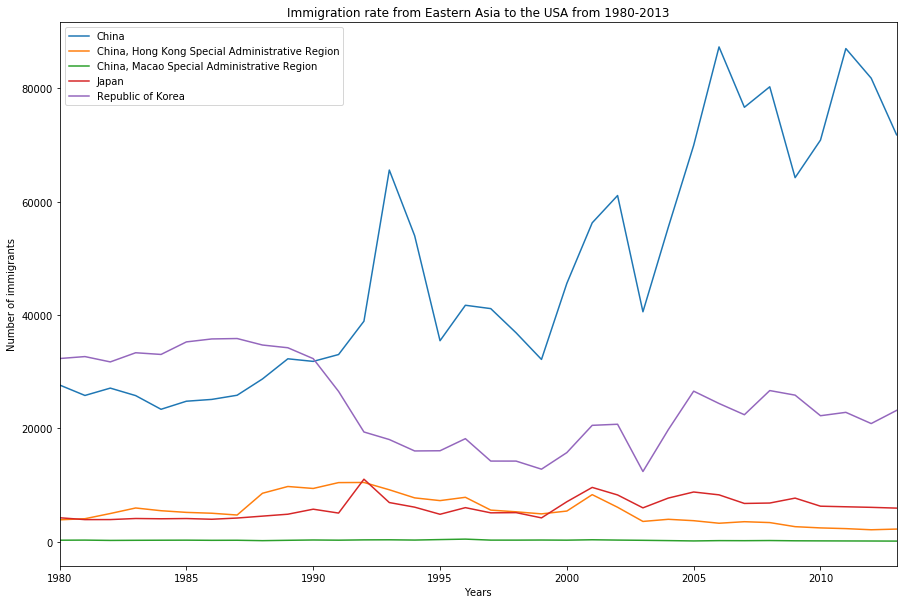

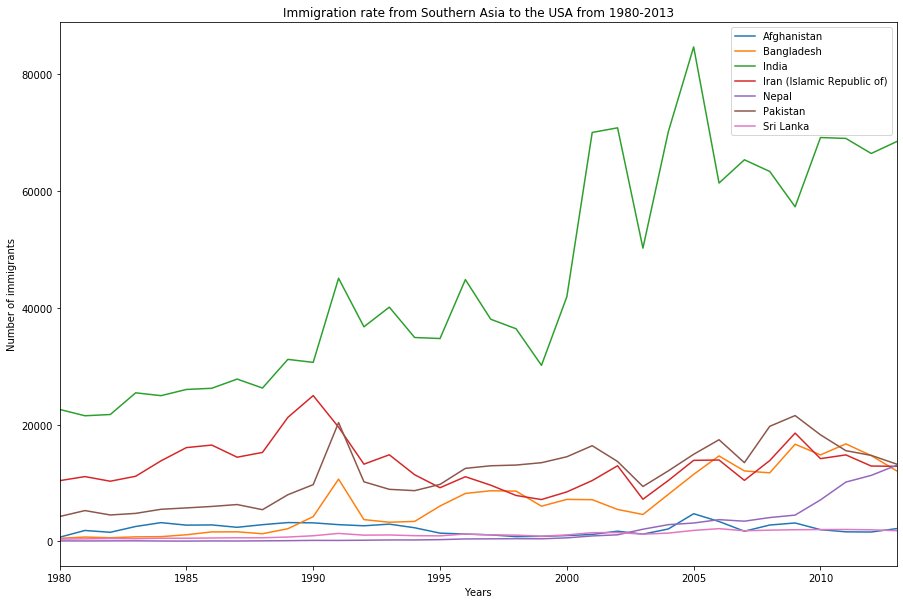

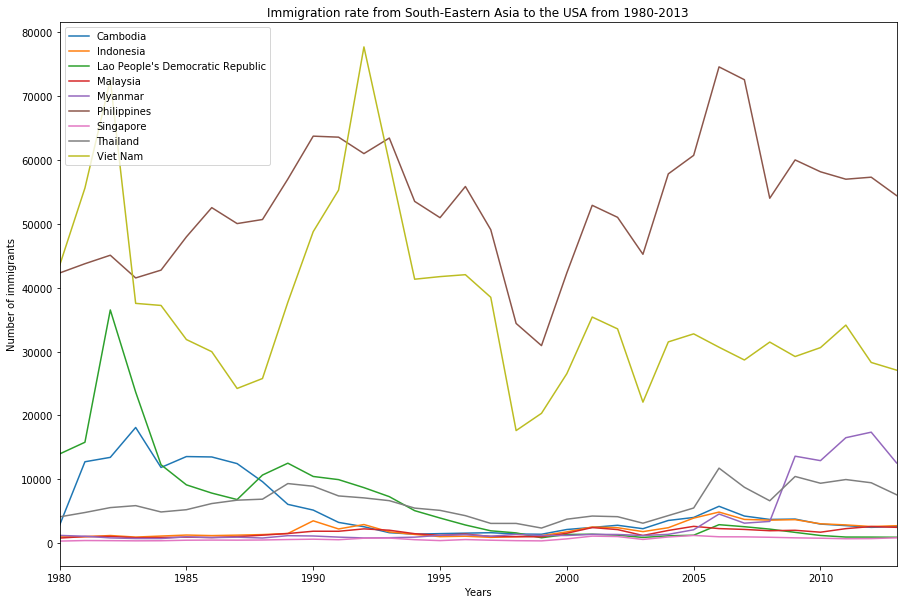

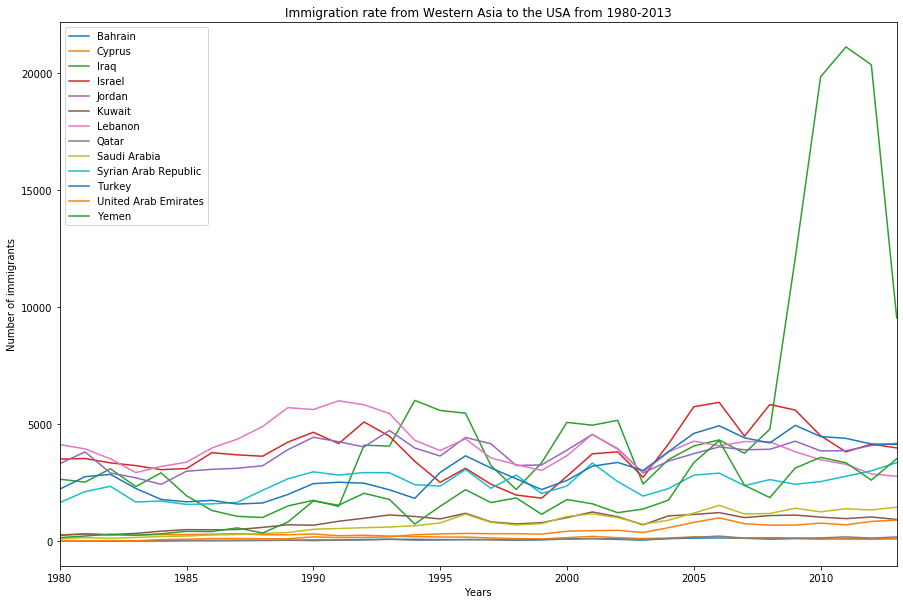

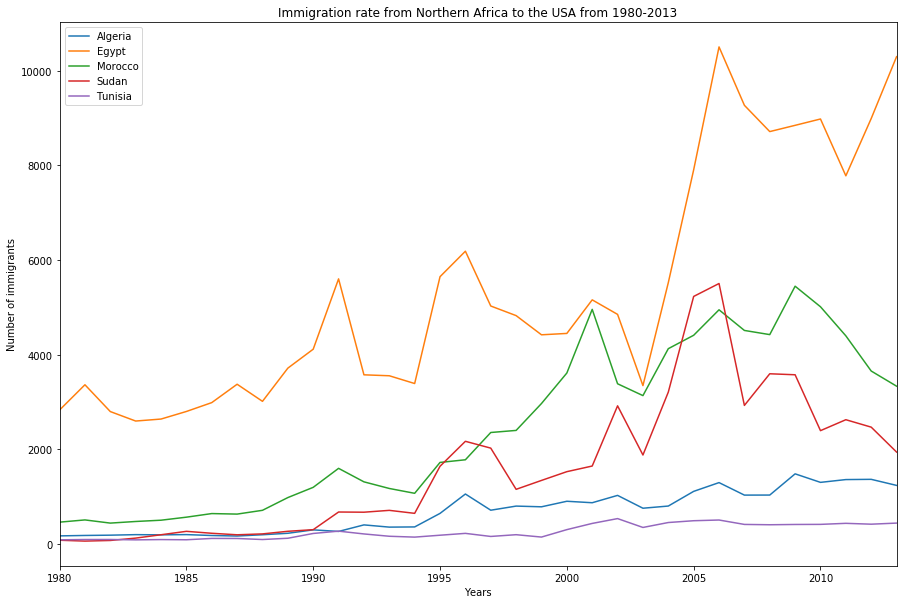

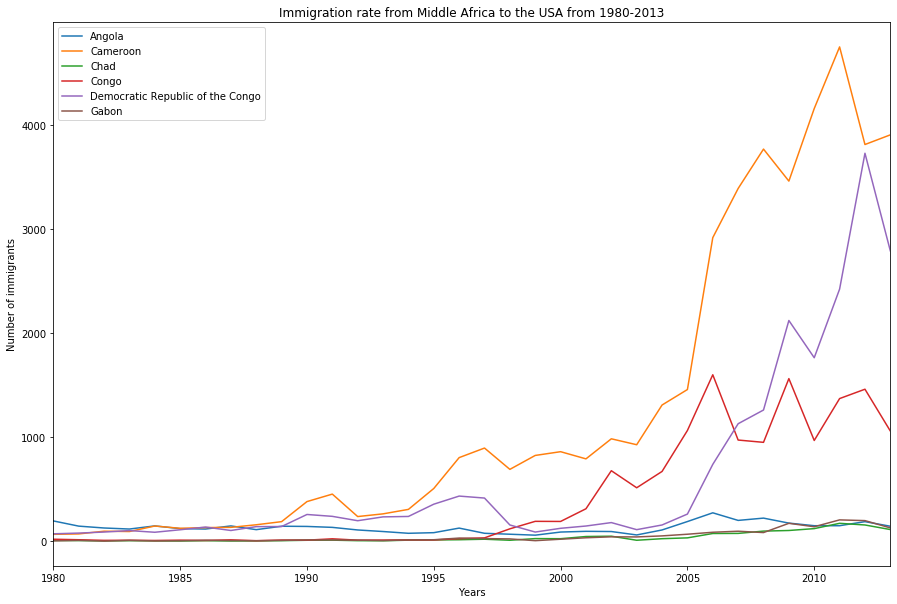

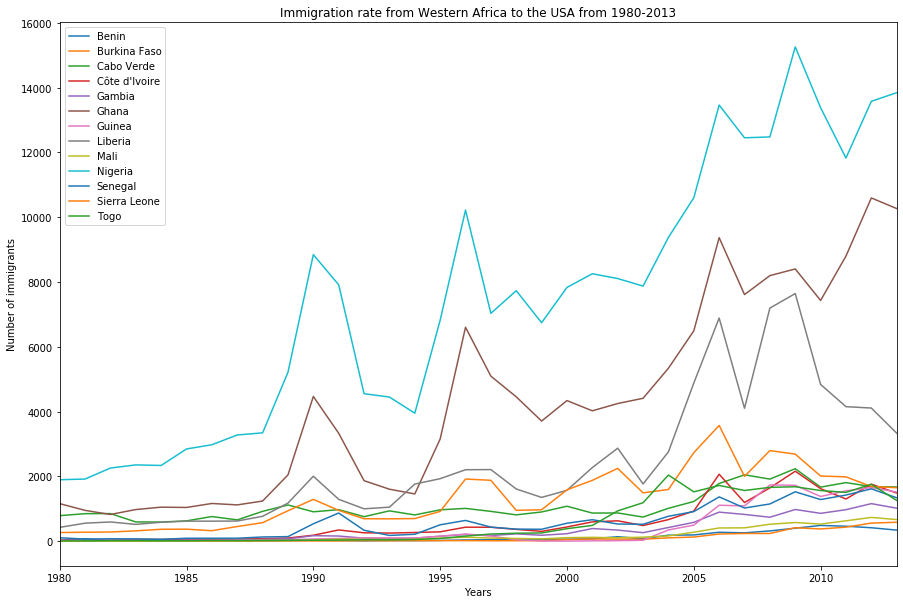

In [20]:
region_names=['Eastern Asia','Southern Asia','South-Eastern Asia',
             'Western Asia','Northern Africa','Middle Africa','Western Africa']

column='Region'

for region_name in region_names:
    line_plot(dataset,column=column,region_name=region_name,colors=None)

### Histogram plots

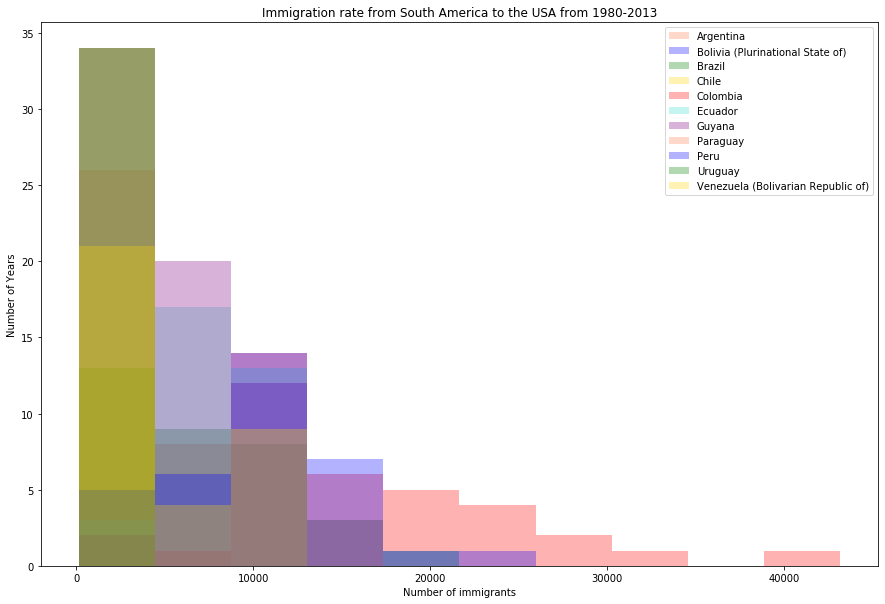

In [21]:
column='Region'
colors=['coral', 'blue', 'green','gold','red','turquoise','purple']
region_name='South America'
hist_plot(dataset,column=column,region_name=region_name,colors=colors)

### Area plots

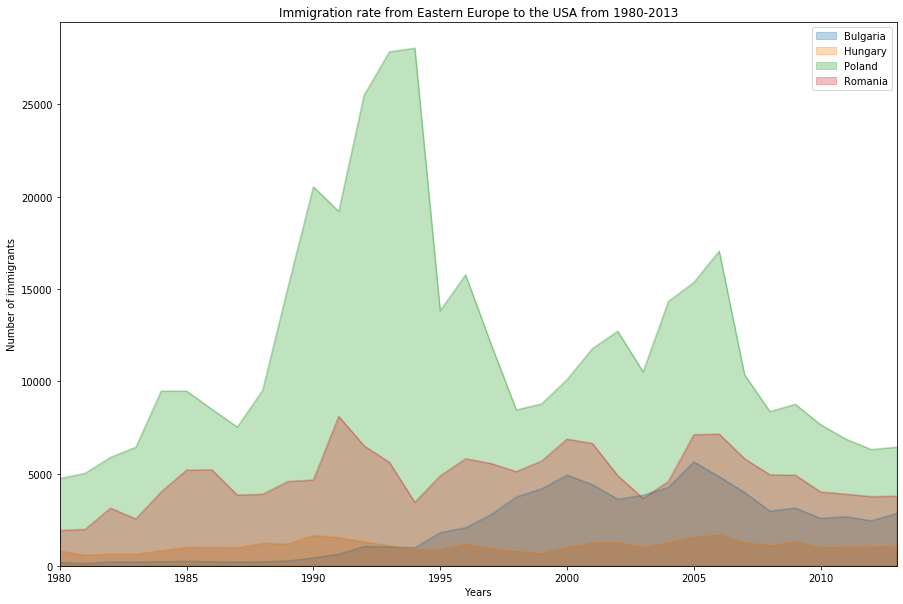

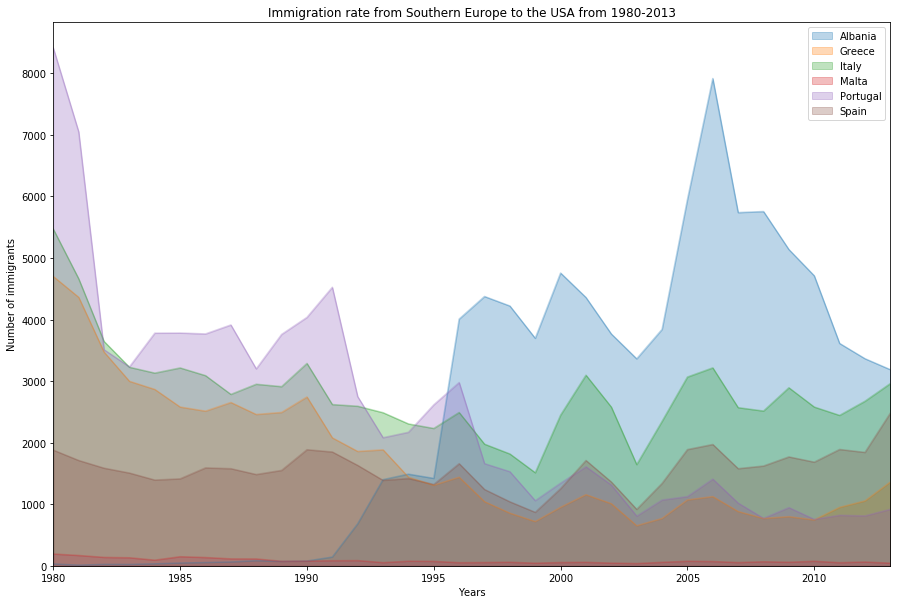

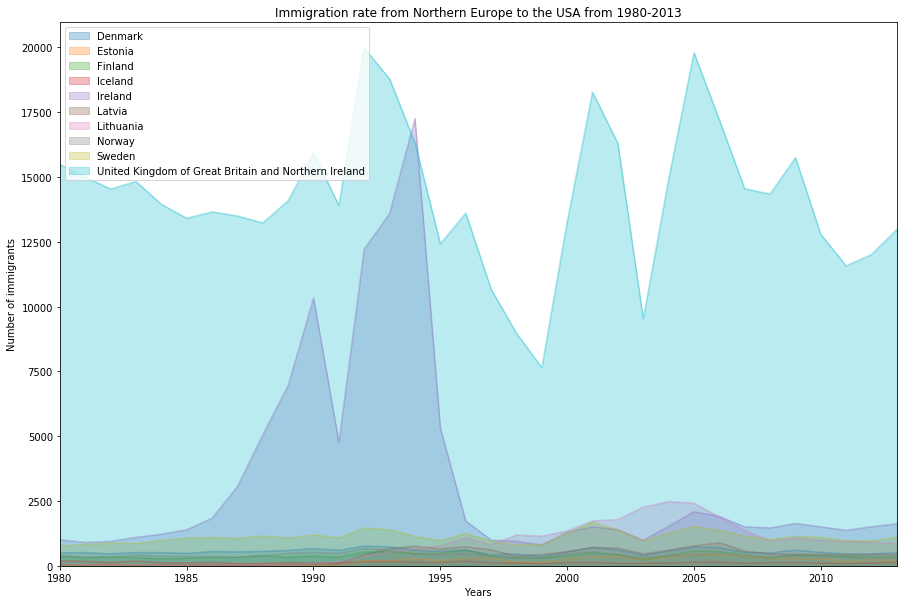

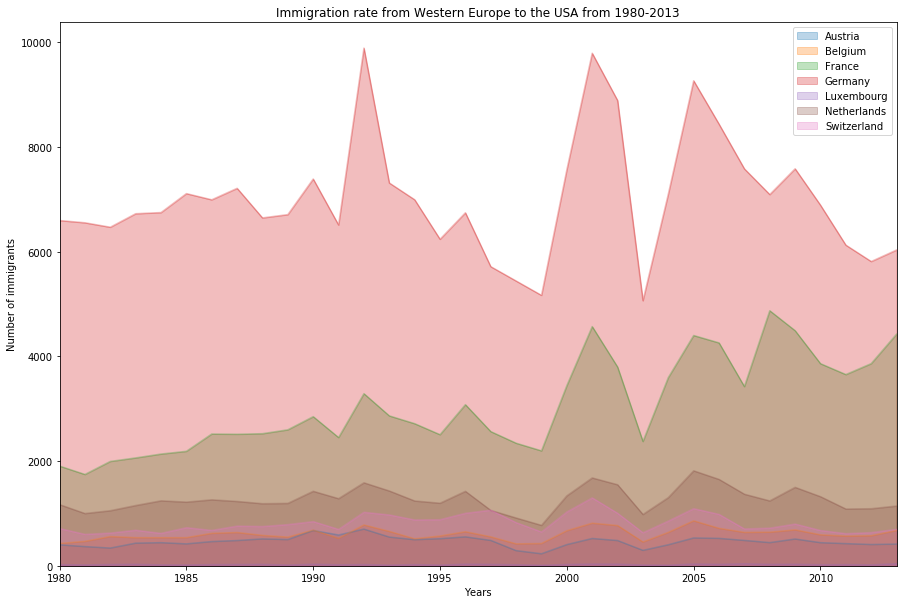

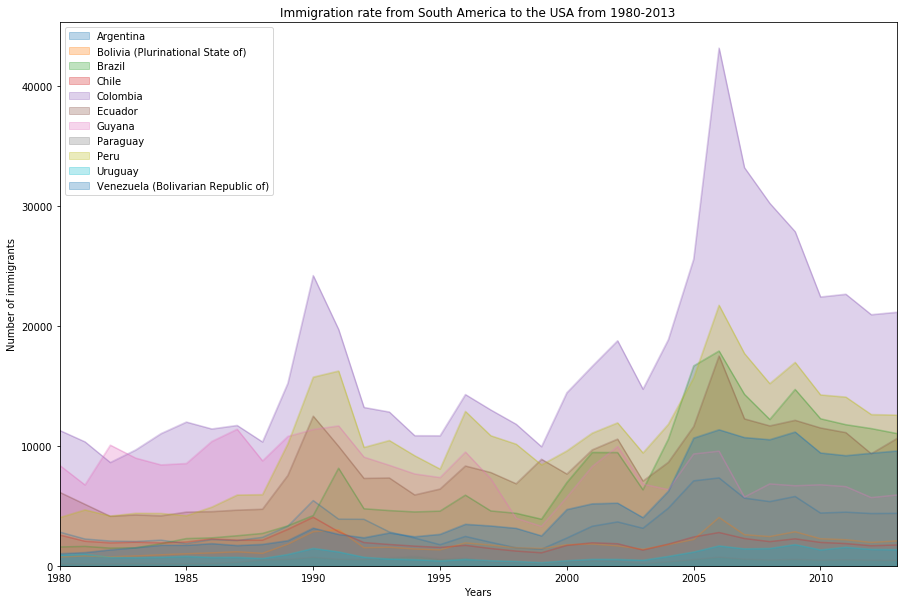

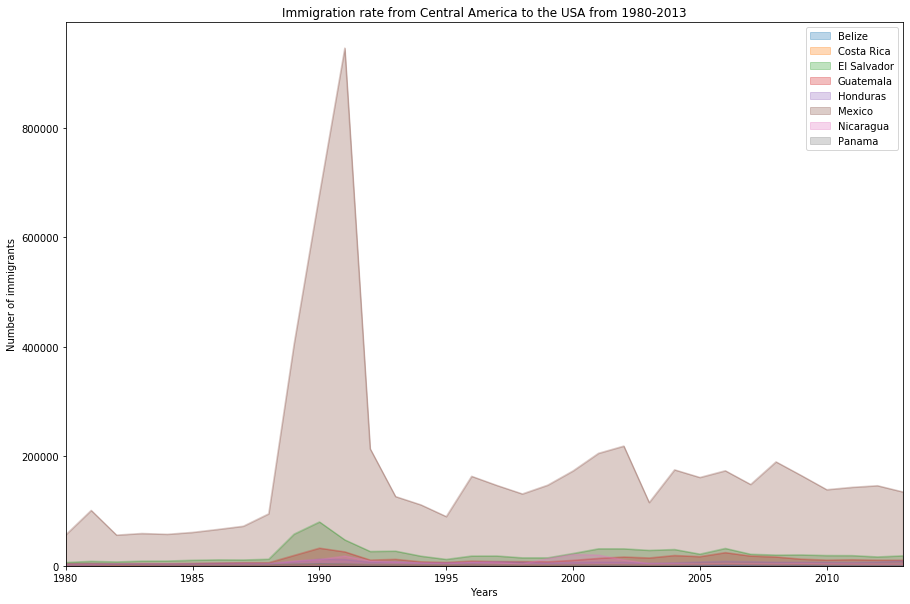

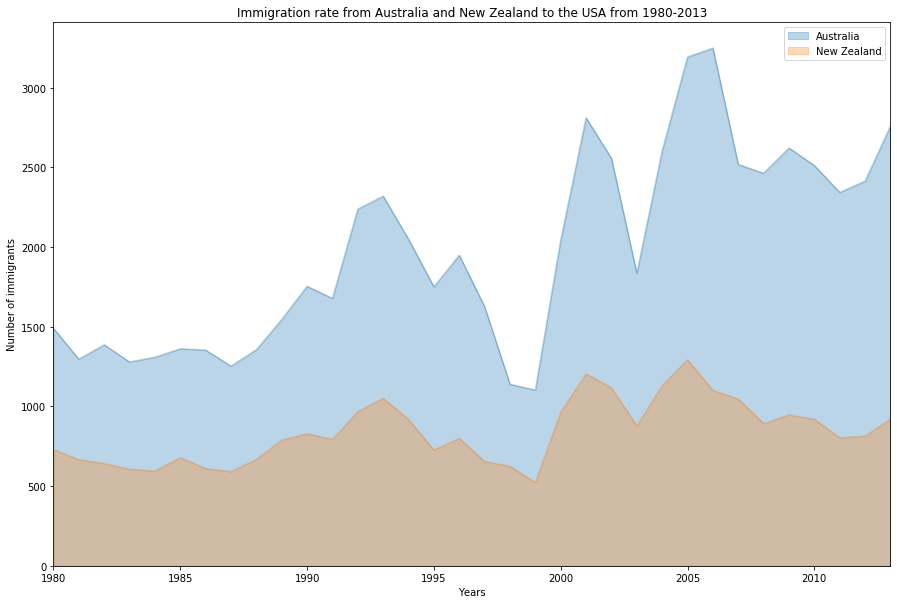

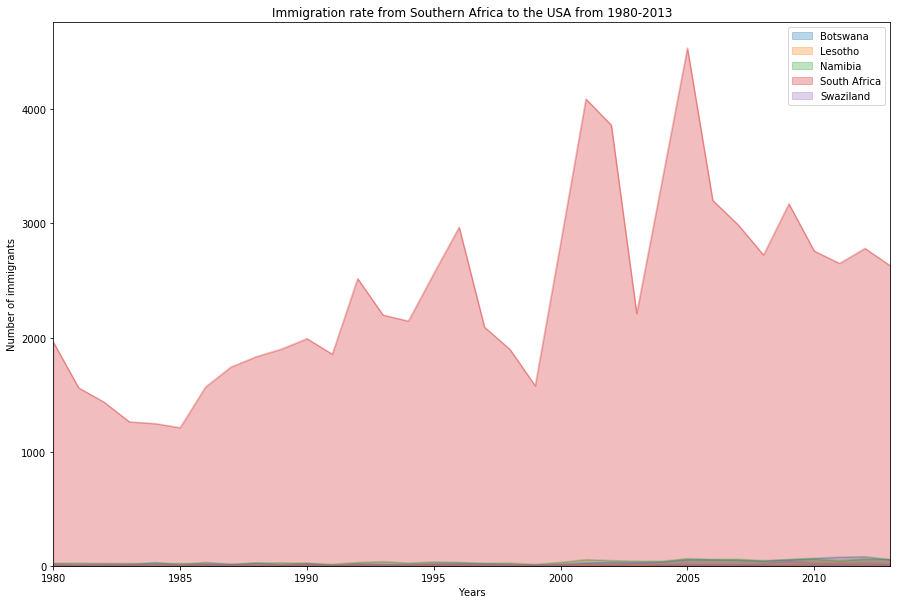

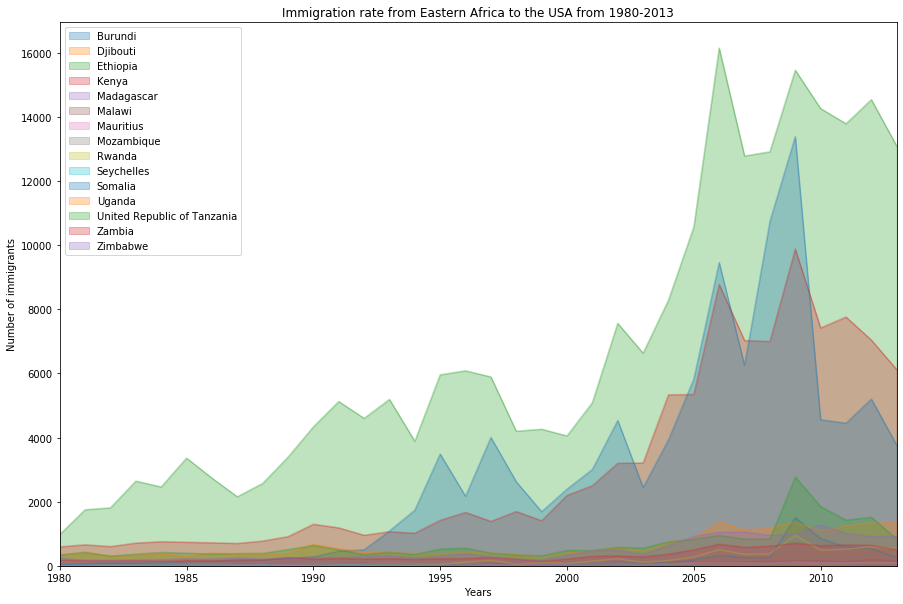

In [22]:
region_names=['Eastern Europe','Southern Europe','Northern Europe','Western Europe',
              'South America','Central America','Australia and New Zealand',
             'Southern Africa','Eastern Africa',]

column='Region'

for region_name in region_names:
    area_plot(dataset,column=column,region_name=region_name,colors=None)

Text(0.5, 1.0, 'Top 20 total number of migrants in to the US')

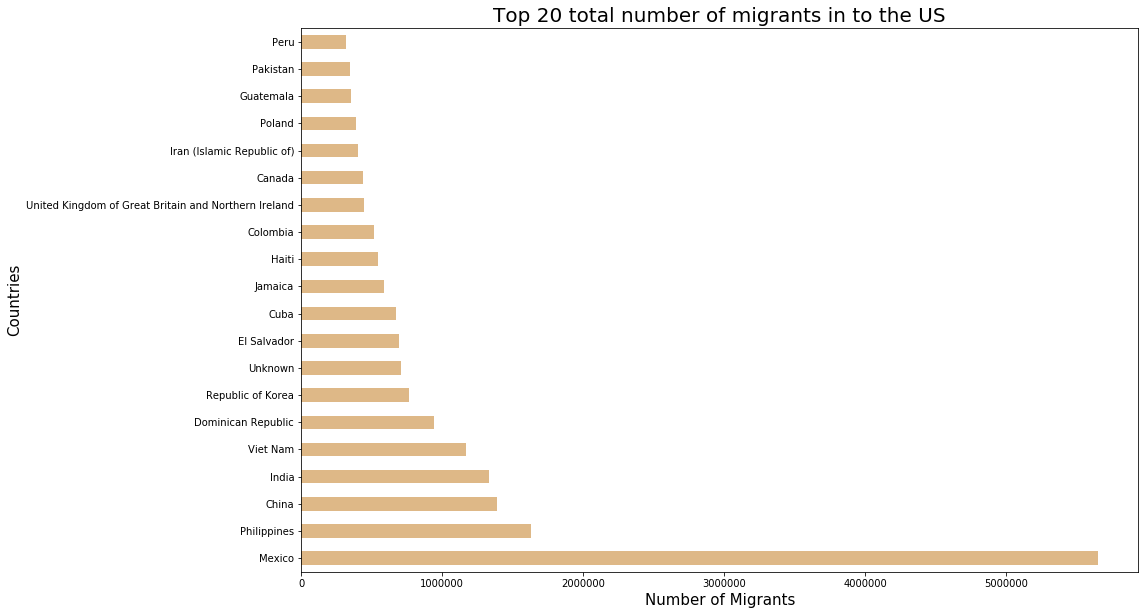

In [23]:
years=list(map(str,range(1980,2014)))
top_20=dataset.sort_values(by='Country_Total',ascending=False)
top_20=top_20.head(20)
top_20['Country_Total'].plot(kind='barh',figsize=(15,10), color='burlywood')
plt.xlabel('Number of Migrants', fontsize=15)
plt.ylabel('Countries', fontsize=15)
plt.title('Top 20 total number of migrants in to the US', fontsize=20)

### Pie Chart

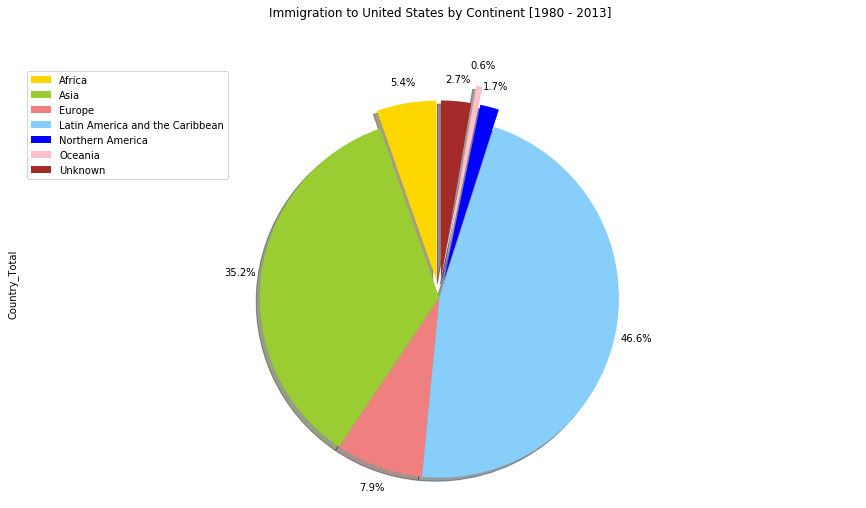

In [24]:
colors_list=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'blue', 'pink','brown']
explode_list=[0.1, 0, 0, 0, 0.1, 0.2, 0.1]
data=dataset
column='Continent'
pie_chart(data,column)

### Bubble plots

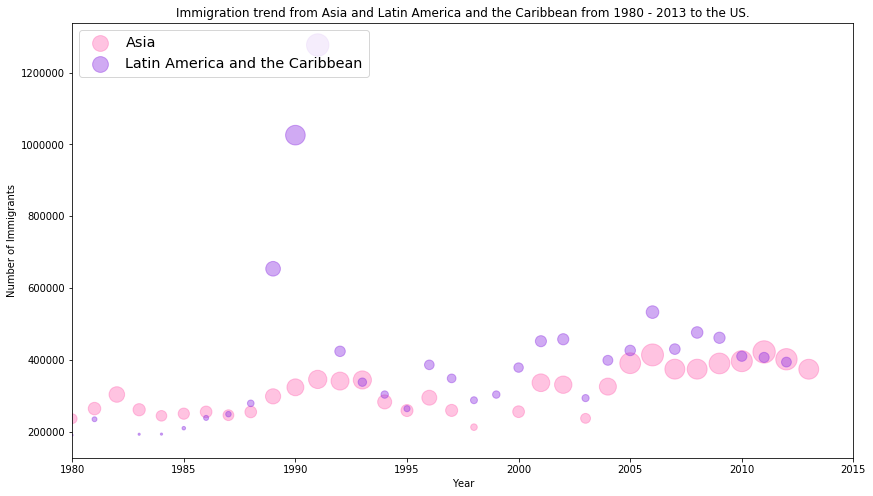

In [25]:
data=dataset
column='Continent'
cont1='Asia'
cont2='Latin America and the Caribbean'
scatter_plot(data,column,cont1,cont2,color1='hotpink',color2='blueviolet')

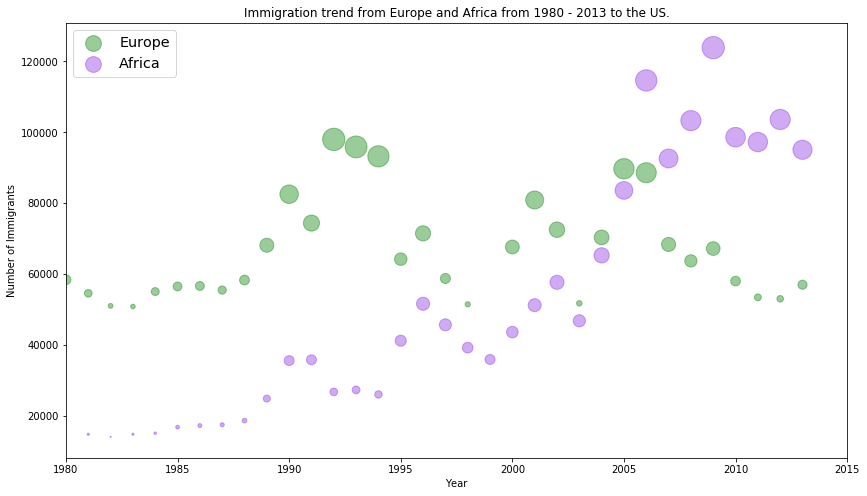

In [26]:
data=dataset
column='Continent'
cont1='Europe'
cont2='Africa'
scatter_plot(data,column,cont1,cont2,color1='green',color2='blueviolet')

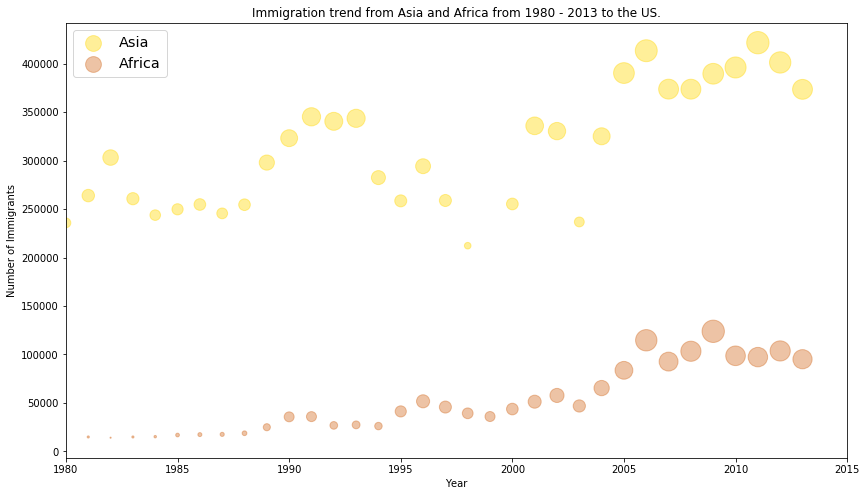

In [27]:
data=dataset
column='Continent'
cont1='Asia'
cont2='Africa'
scatter_plot(data,column,cont1,cont2,color1='gold',color2='chocolate')

### Word Cloud
List of countries where people migrate to the US

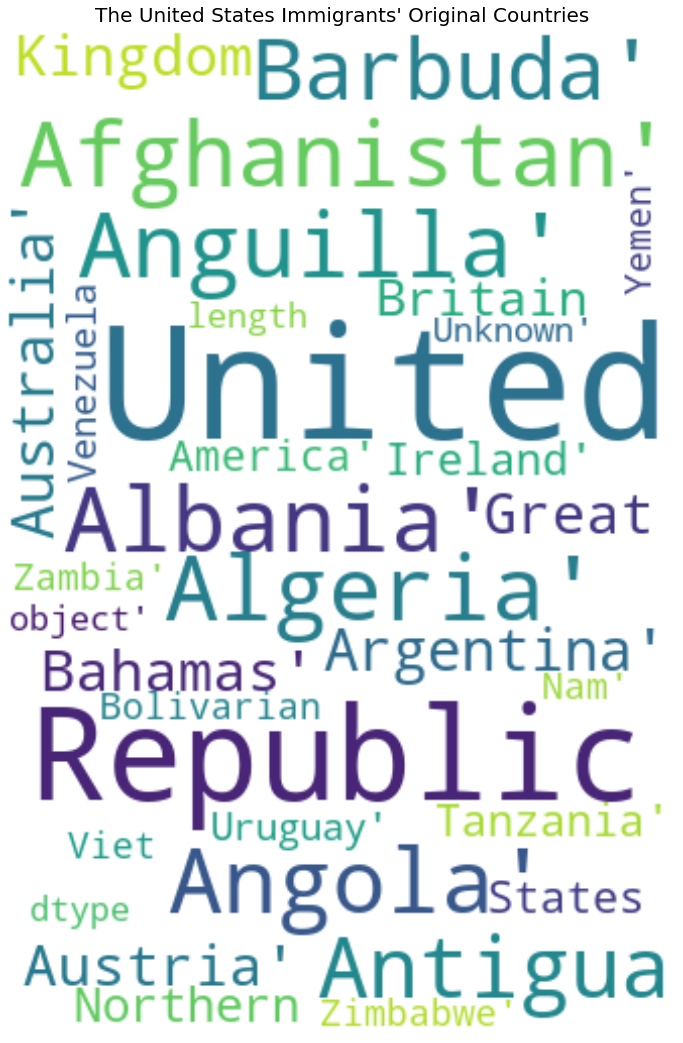

In [28]:
words_lst=dataset.index
stpwds= 'index'
create_word_cloud(words_lst,stpwds=stpwds)

In [199]:
#import matplotlib
#for name in matplotlib.colors.cnames.keys():
#    print(name)